In [2]:
# Let's begin by loading and inspecting the dataset to identify the features and targets for feature selection.

import pandas as pd

# Load the dataset provided by the user
file_path = 'blueberryData.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

day  temperature  hardness      L     a     b      detE  solubleSolid  \
0    0            0      1.64  42.25 -0.19 -0.28  0.000000           9.1   
1    0            0      1.59  39.07 -0.20 -0.28  3.180016           9.4   
2    0            0      1.62  36.41 -0.24 -0.26  5.840248           9.0   
3    0            0      1.62  39.65 -0.12 -0.20  2.602172           9.1   
4    0            0      1.63  37.99 -0.28 -0.25  4.261056           9.8   

   titrableAcid  weightLoss  rotRate  anthocyanin  totalPhenol  flavonoid  \
0         0.328         0.0        0        12.07         4.91       4.64   
1         0.335         0.0        0        12.79         5.66       4.76   
2         0.335         0.0        0        13.30         4.84       5.44   
3         0.335         0.0        0        13.45         5.19       4.32   
4         0.330         0.0        0        12.10         4.54       4.75   

   shelfLife  
0         12  
1         12  
2         12  
3         12  
4         12

In [4]:
# Let's begin by loading and inspecting the dataset to identify the features and targets for feature selection.

import pandas as pd

# Load the dataset provided by the user
file_path = 'blueberryData.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

day  temperature  hardness      L     a     b      detE  solubleSolid  \
0    0            0      1.64  42.25 -0.19 -0.28  0.000000           9.1   
1    0            0      1.59  39.07 -0.20 -0.28  3.180016           9.4   
2    0            0      1.62  36.41 -0.24 -0.26  5.840248           9.0   
3    0            0      1.62  39.65 -0.12 -0.20  2.602172           9.1   
4    0            0      1.63  37.99 -0.28 -0.25  4.261056           9.8   

   titrableAcid  weightLoss  rotRate  anthocyanin  totalPhenol  flavonoid  \
0         0.328         0.0        0        12.07         4.91       4.64   
1         0.335         0.0        0        12.79         5.66       4.76   
2         0.335         0.0        0        13.30         4.84       5.44   
3         0.335         0.0        0        13.45         5.19       4.32   
4         0.330         0.0        0        12.10         4.54       4.75   

   shelfLife  
0         12  
1         12  
2         12  
3         12  
4         12

In [ ]:
# Calculating the correlation between the features and the target nutritional components (solubleSolid, titrableAcid, anthocyanin, totalPhenol, flavonoid)
correlation_matrix = data[['day', 'temperature','hardness','L','a','b','detE','solubleSolid', 'titrableAcid','titrableAcid','weightLoss','rotRate','anthocyanin','totalPhenol','flavonoid','shelfLife']].corr()

# Displaying the correlation matrix
correlation_matrix


# 特征选择

In [4]:
import pandas as pd

# Load the uploaded data file
file_path = 'blueberryData.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic info of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   day           231 non-null    int64  
 1   temperature   231 non-null    int64  
 2   hardness      231 non-null    float64
 3   L             231 non-null    float64
 4   a             231 non-null    float64
 5   b             231 non-null    float64
 6   detE          231 non-null    float64
 7   solubleSolid  231 non-null    float64
 8   titrableAcid  231 non-null    float64
 9   weightLoss    231 non-null    float64
 10  rotRate       231 non-null    int64  
 11  anthocyanin   231 non-null    float64
 12  totalPhenol   231 non-null    float64
 13  flavonoid     231 non-null    float64
 14  shelfLife     231 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 27.2 KB


(   day  temperature  hardness      L     a     b      detE  solubleSolid  \
 0    0            0      1.64  42.25 -0.19 -0.28  0.000000           9.1   
 1    0            0      1.59  39.07 -0.20 -0.28  3.180016           9.4   
 2    0            0      1.62  36.41 -0.24 -0.26  5.840248           9.0   
 3    0            0      1.62  39.65 -0.12 -0.20  2.602172           9.1   
 4    0            0      1.63  37.99 -0.28 -0.25  4.261056           9.8   
 
    titrableAcid  weightLoss  rotRate  anthocyanin  totalPhenol  flavonoid  \
 0         0.328         0.0        0        12.07         4.91       4.64   
 1         0.335         0.0        0        12.79         5.66       4.76   
 2         0.335         0.0        0        13.30         4.84       5.44   
 3         0.335         0.0        0        13.45         5.19       4.32   
 4         0.330         0.0        0        12.10         4.54       4.75   
 
    shelfLife  
 0         12  
 1         12  
 2         12  
 3

In [55]:
from itertools import chain, combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor  # Requires XGBoost library
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# Define the target and features
target = 'shelfLife'
features = data.columns.drop([target, 'L', 'a', 'b', 'temperature', 'day'])

# Generate all possible feature subsets
def all_subsets(lst):
    return chain(*map(lambda x: combinations(lst, x), range(1, len(lst)+1)))

# Prepare models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting Decision Tree (GBDT)": GradientBoostingRegressor(),
    "Adaptive Boosting (AdaBoost)": AdaBoostRegressor(),
    "Extreme Gradient Boosting (XGBoost)": XGBRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Dictionary to hold R2 results
r2_results = {model_name: [] for model_name in models.keys()}
subset_names = []  # to keep track of subset names

# Iterate over all feature subsets
for subset in all_subsets(features):
    X = data[list(subset)]
    y = data[target]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # Track subset names
    subset_names.append(subset)
    
    # Train and test each model on the current subset
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        r2_results[model_name].append(r2)

# Convert the results to a DataFrame for easy viewing
r2_results_df = pd.DataFrame(r2_results, index=subset_names)
r2_results_df.head()


Linear Regression  Decision Tree  Random Forest  \
(hardness,)               0.136680       0.229249       0.254447   
(detE,)                   0.195215       0.067555       0.057211   
(solubleSolid,)           0.297522      -0.115431      -0.104385   
(titrableAcid,)           0.343243       0.034826       0.157892   
(weightLoss,)             0.046397       0.666784       0.661671   

                 Gradient Boosting Decision Tree (GBDT)  \
(hardness,)                                    0.244214   
(detE,)                                        0.107709   
(solubleSolid,)                               -0.095146   
(titrableAcid,)                                0.042933   
(weightLoss,)                                  0.666788   

                 Adaptive Boosting (AdaBoost)  \
(hardness,)                          0.252323   
(detE,)                              0.154788   
(solubleSolid,)                     -0.048056   
(titrableAcid,)                      0.128501   
(weightLoss,)                        0.673777   

                 Extreme Gradient Boosting (XGBoost)  Support Vector Machine  \
(hardness,)                                 0.176889                0.096799   
(detE,)                                    -0.104009                0.089297   
(solubleSolid,)                            -0.231835                0.343732   
(titrableAcid,)                             0.070035                0.468449   
(weightLoss,)                               0.665024               -0.124345   

                 K-Nearest Neighbors  
(hardness,)                 0.297725  
(detE,)                     0.091709  
(solubleSolid,)            -0.165403  
(titrableAcid,)             0.336222  
(weightLoss,)               0.359787

In [63]:
r2_results_df.to_csv('r2_results_df.csv')

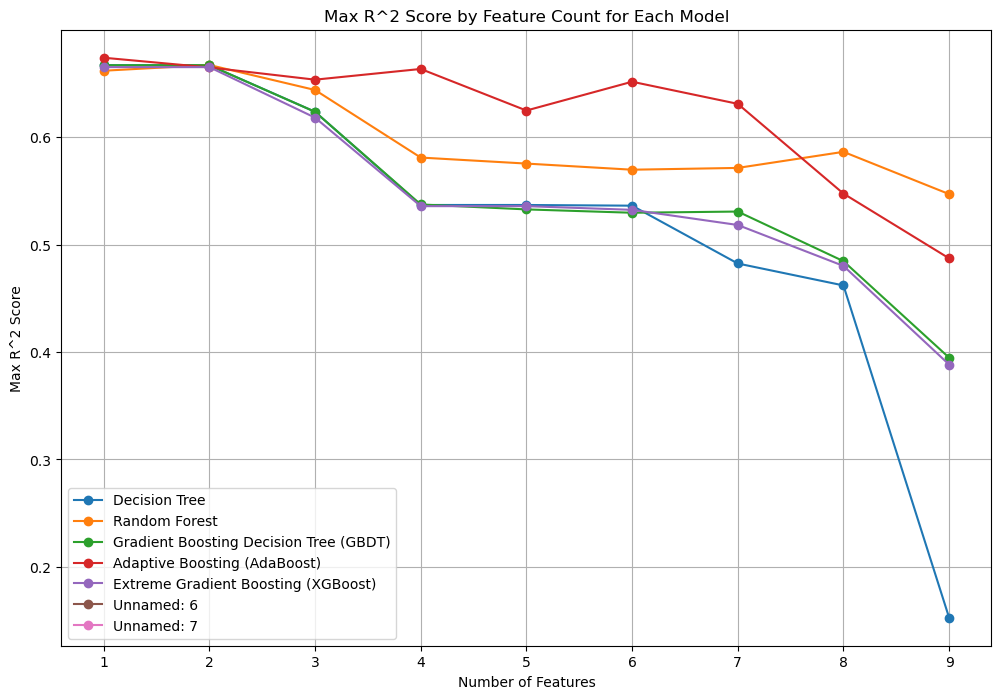

In [67]:
# Load the r2_results_df from the uploaded file
r2_results_df_path = 'r2_results_df.csv'
r2_results_df = pd.read_csv(r2_results_df_path, index_col=0)
# Extract R^2 scores by model for each feature count
# Calculate the maximum R^2 value for each model across subsets of the same feature count
r2_results_df['Feature Count'] = r2_results_df.index.map(lambda x: len(eval(x)))  # calculate feature count for each subset
max_r2_by_feature_count_model = r2_results_df.groupby('Feature Count').max()  # max R^2 per feature count per model

# Plot the R^2 values for each model
plt.figure(figsize=(12, 8))
for model_name in max_r2_by_feature_count_model.columns:
    plt.plot(max_r2_by_feature_count_model.index, max_r2_by_feature_count_model[model_name], marker='o', label=model_name)

# Customize the plot
plt.xlabel('Number of Features')
plt.ylabel('Max R^2 Score')
plt.title('Max R^2 Score by Feature Count for Each Model')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})

# 绘制核密度图
plt.figure(figsize=(12, 6))
sns.kdeplot(data['feature1'], bw_adjust=0.5, label='Feature 1', fill=True)
sns.kdeplot(data['feature2'], bw_adjust=0.5, label='Feature 2', fill=True)

# 自定义图形
plt.title('Kernel Density Estimate (KDE) of Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


feature1  feature2 DAY(timestamp) MONTH(timestamp) WEEKDAY(timestamp)  \
id                                                                          
0          1        10              1                1                  6   
1          2        20              2                1                  0   
2          3        30              3                1                  1   
3          4        40              4                1                  2   

   YEAR(timestamp)  
id                  
0             2023  
1             2023  
2             2023  
3             2023